In [1]:
import numpy as np
from keras import Sequential
from keras.api.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_X = train_X / 255
test_X = test_X / 255

In [4]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(train_y.reshape(-1, 1))

train_y = ohe.transform(train_y.reshape(-1, 1))
test_y = ohe.transform(test_y.reshape(-1, 1))

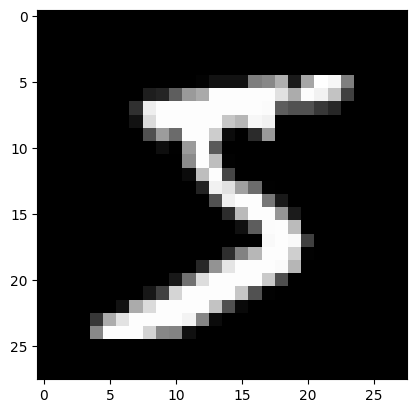

In [5]:
plt.imshow(train_X[0], cmap='gray')
plt.show()

In [6]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         6,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,426 (29.01 KB)

 Trainable params: 7,426 (29.01 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_X, train_y, epochs=10, batch_size=100, verbose=True, validation_data=(test_X, test_y))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6478 - loss: 1.2801 - val_accuracy: 0.9378 - val_loss: 0.2734
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9407 - loss: 0.2430 - val_accuracy: 0.9578 - val_loss: 0.1600
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9585 - loss: 0.1549 - val_accuracy: 0.9616 - val_loss: 0.1303
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9648 - loss: 0.1262 - val_accuracy: 0.9695 - val_loss: 0.1022
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9694 - loss: 0.1053 - val_accuracy: 0.9736 - val_loss: 0.0879
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9740 - loss: 0.0918 - val_accuracy: 0.9721 - val_loss: 0.0934
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9751 - loss: 0.0858 - val_accuracy: 0.9744 - val_loss: 0.0801
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9789 - loss: 0.0752 - val_accuracy: 0.

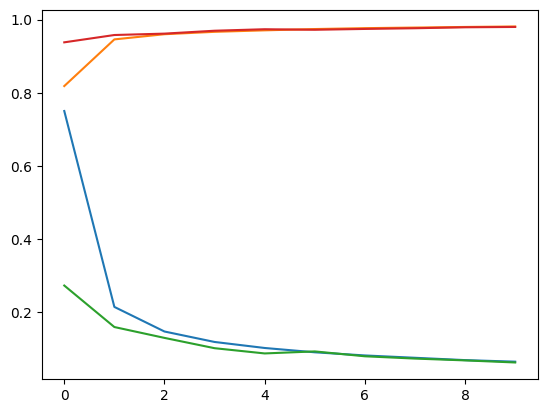

In [9]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_loss'], label='test_loss')
plt.plot(history.history['val_accuracy'], label='test_acc')

plt.show()

In [10]:
preds = model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[]

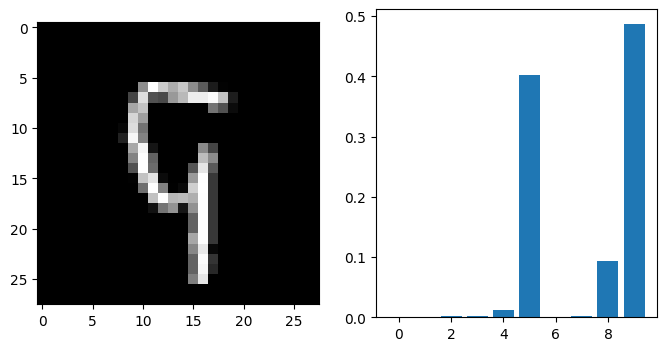

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

image_idx = 62
ax1.imshow(test_X[image_idx], cmap='gray')

ax2.bar(np.arange(10), preds[image_idx])

plt.plot()

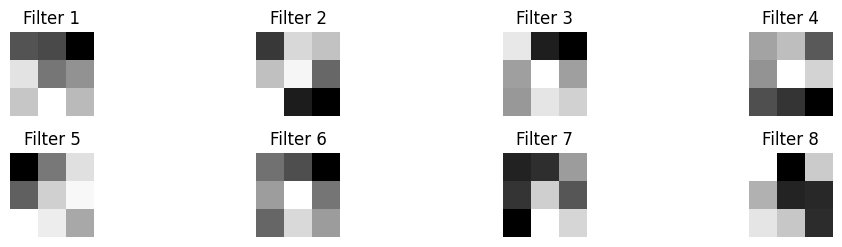

In [117]:
conv_layer = model.layers[0]
weights = conv_layer.get_weights()[0]

plt.figure(figsize=(10, 5))
for i in range(weights.shape[3]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title('Filter {}'.format(i + 1))
plt.tight_layout()
plt.show()